In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam, SGD

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# dataset = pd.read_csv('/content/drive/My Drive/Riset CNN/Batik MTCD/mtcd_label.csv')
dataset = pd.read_csv('/content/drive/My Drive/Riset CNN/Batik MTCD/mtcd_full_master.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,21136.500000,0.666667,0.0,0.0,15.166667,13.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5127.000000,0.000000,0.0,0.0,7264.166667,1512.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.500000,0.0,0.0,0.0,4101.166667,642.833333,...,0.000000,0.0,0.0,0.0,0.0,0.0,28958.000000,1619.333333,661.000000,362.333333,266.000000,192.333333,168.666667,152.833333,141.000000,489.666667,160.166667,159.000000,204.833333,272.000000,392.666667,710.500000,1725.000000,3364.666667,0.017684,0.016472,0.018142,0.016313,416.081244,586.772273,364.940998,656.150941,0.785691,0.697826,0.812028,0.662097,12.646687,12.833858,12.575110,12.880773
1,1,10,22071.333333,0.333333,0.0,0.0,4.666667,7.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4230.333333,0.333333,0.0,0.0,5918.000000,2096.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.833333,0.0,0.0,0.0,4430.333333,959.833333,...,0.333333,0.0,0.0,0.0,0.0,0.0,29166.333333,1612.333333,621.500000,319.333333,223.333333,173.000000,126.000000,114.500000,121.833333,455.500000,114.666667,148.333333,157.833333,239.000000,342.666667,623.000000,1680.500000,3760.333333,0.014710,0.013828,0.015218,0.013786,536.833915,743.266145,430.642164,777.668566,0.754992,0.660794,0.803390,0.645093,12.984173,13.152369,12.874168,13.169196
2,1,100,22514.333333,0.666667,0.0,0.0,5.000000,12.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4286.166667,3.333333,0.0,0.0,6425.666667,2298.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.333333,0.0,0.0,0.0,3501.166667,745.666667,...,0.000000,0.0,0.0,0.0,0.0,0.0,29033.500000,1527.333333,615.833333,317.000000,202.333333,151.666667,138.500000,102.500000,96.333333,442.833333,112.666667,121.500000,156.833333,222.333333,329.333333,632.500000,1698.500000,4098.500000,0.014666,0.013756,0.015159,0.013640,492.759211,701.857833,415.952995,745.194296,0.760825,0.659365,0.798035,0.638332,12.929446,13.111270,12.839011,13.137789
3,1,101,22488.166667,2.500000,0.0,0.0,7.166667,16.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4144.333333,1.000000,0.0,0.0,6547.833333,2291.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.833333,0.0,0.0,0.0,3514.166667,774.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,29056.666667,1569.166667,603.333333,320.333333,227.166667,152.000000,117.666667,116.333333,101.166667,437.333333,116.500000,125.333333,158.500000,207.333333,335.666667,642.833333,1671.000000,4041.666667,0.014589,0.013687,0.015102,0.013619,494.342642,708.947377,418.026667,744.620554,0.760743,0.656914,0.797666,0.639649,12.937981,13.119897,12.845698,13.139987
4,1,102,22151.333333,1.000000,0.0,0.0,6.833333,12.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4229.166667,1.333333,0.0,0.0,6859.166667,2327.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.833333,0.0,0.0,0.0,3401.333333,807.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,29170.666667,1549.166667,612.166667,316.333333,211.166667,162.333333,128.666667,110.500000,107.833333,439.666667,112.666667,135.500000,160.333333,234.166667,321.000000,651.666667,1683.166667,3893.000000,0.014614,0.013696,0.015132,0.013625,493.129353,701.892879,413.022373,738.018276,0.759646,0.657927,0.798693,0.640321,12.932528,13.113664,12.835464,13.133776


In [0]:
# data = dataset.drop(['Unnamed: 0'],axis=1)
data = dataset.drop([1],axis=1)

In [0]:
# data = data.sort_values('target')
data = dataset.sort_values(0)

In [0]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,21136.500000,0.666667,0.0,0.0,15.166667,13.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5127.000000,0.000000,0.0,0.0,7264.166667,1512.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.500000,0.0,0.0,0.0,4101.166667,642.833333,...,0.000000,0.0,0.0,0.0,0.0,0.0,28958.000000,1619.333333,661.000000,362.333333,266.000000,192.333333,168.666667,152.833333,141.000000,489.666667,160.166667,159.000000,204.833333,272.000000,392.666667,710.500000,1725.000000,3364.666667,0.017684,0.016472,0.018142,0.016313,416.081244,586.772273,364.940998,656.150941,0.785691,0.697826,0.812028,0.662097,12.646687,12.833858,12.575110,12.880773
87,1,7,21704.500000,1.000000,0.0,0.0,3.333333,9.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4621.500000,0.333333,0.0,0.0,6386.500000,1940.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.166667,0.0,0.0,0.0,4208.666667,867.166667,...,0.000000,0.0,0.0,0.0,0.0,0.0,29271.833333,1664.666667,632.500000,331.166667,236.000000,176.333333,144.000000,117.333333,113.500000,458.166667,120.166667,132.000000,176.500000,232.833333,338.166667,664.500000,1637.000000,3553.333333,0.014823,0.013923,0.015340,0.013872,521.321694,718.648583,426.872865,760.970824,0.756564,0.664470,0.800738,0.644709,12.956127,13.124392,12.853632,13.144888
86,1,69,22788.666667,0.833333,0.0,0.0,3.666667,14.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4020.333333,1.500000,0.0,0.0,6226.500000,2195.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.833333,0.0,0.0,0.0,3681.833333,837.166667,...,0.000000,0.0,0.0,0.0,0.0,0.0,28966.333333,1500.666667,560.166667,298.833333,195.166667,162.333333,147.166667,114.000000,131.833333,458.333333,124.500000,130.000000,166.833333,217.333333,319.833333,617.166667,1652.333333,4237.166667,0.016900,0.015872,0.017337,0.015742,516.915275,734.793825,451.181337,788.966862,0.762764,0.662732,0.792868,0.637868,12.821914,12.998329,12.749902,13.029116
85,1,68,22664.000000,1.666667,0.0,0.0,2.333333,8.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4476.833333,1.000000,0.0,0.0,6237.500000,2157.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,3404.666667,817.666667,...,0.000000,0.0,0.0,0.0,0.0,0.0,29109.333333,1536.500000,578.166667,308.166667,202.500000,153.500000,138.500000,112.166667,104.333333,447.833333,109.333333,122.333333,153.500000,225.000000,308.666667,615.500000,1614.000000,4160.666667,0.014696,0.013826,0.015049,0.013756,544.367542,768.809938,472.933947,812.717809,0.750450,0.647524,0.783084,0.627392,12.994267,13.167220,12.922593,13.190527
84,1,67,22810.833333,1.500000,0.0,0.0,4.166667,8.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4504.500000,0.833333,0.0,0.0,6226.833333,2086.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.666667,0.0,0.0,0.0,3354.333333,781.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,29198.500000,1550.666667,585.833333,314.000000,199.000000,155.500000,141.500000,100.333333,97.000000,433.833333,112.333333,117.000000,153.333333,216.333333,312.333333,609.166667,1617.000000,4086.333333,0.014970,0.014059,0.015325,0.014000,532.532871,753.012912,469.456763,798.082397,0.753208,0.650992,0.782424,0.630108,12.965524,13.140618,12.899475,13.164391
83,1,66,22728.500000,1.000000,0.0,0.0,6.666667,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4659.666667,1.166667,0.0,0.0,6275.666667,2008.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.666667,0.0,0.0,0.0,3354.333333,764.666667,...,0.000000,0.0,0.0,0.0,0.0,0.0,29057.333333,1528.000000,571.000000,320.833333,206.333333,150.333333,122.666667,109.666667,97.333333,441.000000,121.000000,139.666667,158.333333,212.500000,318.833333,600.500000,1680.333333,4164.333333,0.015237,0.014314,0.015587,0.014183,516.199520,727.801884,460.874871,786.668930,0.754385,0.653701,0.780645,0.625693,12.922905,13.097035,12.862244,13.129668
82,1,65,22

In [0]:
X_train = []
Y_train = []
X_test = []
Y_test = []
i = 1
for row in data.iterrows() :
  if (i%10==0) :
    X_test.append(row[1].values[0:98])
    Y_test.append(row[1].values[0])
  else :
    X_train.append(row[1].values[0:98])
    Y_train.append(row[1].values[0])
  i = i+1

In [0]:
x_train = np.array(X_train)
y_train = np.array(Y_train)
x_test = np.array(X_test)
y_test = np.array(Y_test)

In [0]:
y_train

array([  1.,   1.,   1., ..., 355., 355., 355.])

In [0]:
y_test

array([  1.,   1.,   1., ..., 355., 355., 355.])

In [0]:
x_test

array([[1.00000000e+00, 6.20000000e+01, 2.22758333e+04, ...,
        6.34760230e-01, 1.28110340e+01, 1.30011789e+01],
       [1.00000000e+00, 5.30000000e+01, 2.24120000e+04, ...,
        6.36820579e-01, 1.30072618e+01, 1.31748916e+01],
       [1.00000000e+00, 7.30000000e+01, 2.26038333e+04, ...,
        6.32994169e-01, 1.29953391e+01, 1.31710238e+01],
       ...,
       [3.55000000e+02, 3.00000000e+01, 3.01568333e+04, ...,
        9.35124148e-01, 8.45767734e+00, 9.02743358e+00],
       [3.55000000e+02, 2.10000000e+01, 2.61283333e+04, ...,
        9.36897172e-01, 9.10956193e+00, 9.62735736e+00],
       [3.55000000e+02, 4.00000000e+01, 2.64431667e+04, ...,
        9.59381539e-01, 9.28300888e+00, 9.92692373e+00]])

In [0]:
x_train

array([[1.00000000e+00, 1.00000000e+00, 2.11365000e+04, ...,
        6.62097330e-01, 1.26466871e+01, 1.28338579e+01],
       [1.00000000e+00, 7.00000000e+00, 2.17045000e+04, ...,
        6.44708995e-01, 1.29561272e+01, 1.31243916e+01],
       [1.00000000e+00, 6.90000000e+01, 2.27886667e+04, ...,
        6.37867881e-01, 1.28219141e+01, 1.29983289e+01],
       ...,
       [3.55000000e+02, 1.40000000e+01, 2.94990000e+04, ...,
        9.51411630e-01, 8.67239960e+00, 9.17621751e+00],
       [3.55000000e+02, 1.30000000e+01, 2.99790000e+04, ...,
        9.54485092e-01, 8.49406099e+00, 9.03195262e+00],
       [3.55000000e+02, 9.90000000e+01, 3.17295000e+04, ...,
        9.51009653e-01, 8.13326773e+00, 8.67481420e+00]])

In [0]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

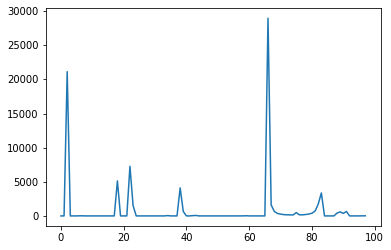

In [0]:
plt.plot(x_train[0])

# **Over Fitting and Under Fitting Model**

In [0]:
model = keras.Sequential([
    keras.layers.Dense(1028, input_shape=(98,), activation=tf.nn.sigmoid),
    keras.layers.Dense(512, activation=tf.nn.sigmoid),
    keras.layers.Dense(256, activation=tf.nn.sigmoid),
    keras.layers.Dense(355, activation=tf.nn.softmax)
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              101772    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 355)               91235     
Total params: 851,183
Trainable params: 851,183
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
baseline_history = model.fit(x_train,
                          y_train,
                          epochs=100,
                          batch_size=2056,
                          validation_data=(x_test, y_test),
                          verbose=2)

Train on 37459 samples, validate on 4162 samples
Epoch 1/100
37459/37459 - 5s - loss: 5.8359 - acc: 0.0097 - val_loss: 5.6900 - val_acc: 0.0269
Epoch 2/100
37459/37459 - 4s - loss: 5.4518 - acc: 0.0519 - val_loss: 5.0461 - val_acc: 0.1000
Epoch 3/100
37459/37459 - 4s - loss: 4.6655 - acc: 0.1509 - val_loss: 4.1955 - val_acc: 0.2463
Epoch 4/100
37459/37459 - 4s - loss: 3.8596 - acc: 0.3202 - val_loss: 3.4551 - val_acc: 0.4551
Epoch 5/100
37459/37459 - 4s - loss: 3.1788 - acc: 0.5101 - val_loss: 2.8384 - val_acc: 0.6168
Epoch 6/100
37459/37459 - 4s - loss: 2.6100 - acc: 0.6326 - val_loss: 2.3216 - val_acc: 0.7222
Epoch 7/100
37459/37459 - 4s - loss: 2.1318 - acc: 0.7216 - val_loss: 1.8929 - val_acc: 0.7826
Epoch 8/100
37459/37459 - 4s - loss: 1.7428 - acc: 0.7904 - val_loss: 1.5440 - val_acc: 0.8311
Epoch 9/100
37459/37459 - 4s - loss: 1.4263 - acc: 0.8352 - val_loss: 1.2718 - val_acc: 0.8606
Epoch 10/100
37459/37459 - 4s - loss: 1.1808 - acc: 0.8619 - val_loss: 1.0527 - val_acc: 0.8803


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback
from sklearn.metrics import classification_report

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


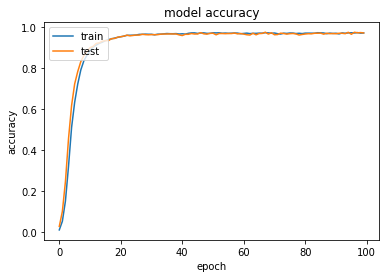

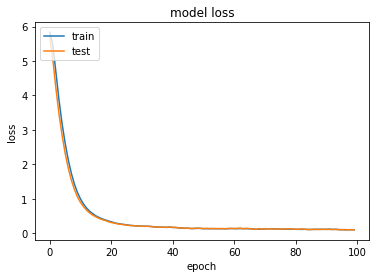

In [0]:
# list all data in history
print(baseline_history.history.keys())
# summarize history for accuracy
plt.plot(baseline_history.history['acc'])
plt.plot(baseline_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
train_loss, train_acc = model.evaluate(x_train,y_train)
print('Train accuracy:', train_acc)

37459/37459 [==============================] - 3s 93us/sample - loss: 0.0978 - acc: 0.9725
Train accuracy: 0.97252995


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

4162/4162 [==============================] - 0s 94us/sample - loss: 0.0986 - acc: 0.9709
Test accuracy: 0.9709274


In [0]:
y_true = y_test
y_true

array([  0,   0,   0, ..., 354, 354, 354])

In [0]:
y_pred = model.predict_classes(x_test)
y_pred

array([  0,   0,   0, ..., 354, 354, 354])

In [0]:
print("Precision Score : ",precision_score(y_true, y_pred,average='micro'))

Precision Score :  0.9709274387313791


In [0]:
print("Recall Score : ",recall_score(y_true,y_pred,average='micro'))

Recall Score :  0.9709274387313791


In [0]:
print("Accuracy Score : ",accuracy_score(y_true,y_pred))

Accuracy Score :  0.9709274387313791


In [0]:
target_names = []
for i in range(355):
  target_names.append('Batik '+str(i))

In [0]:
target_names

['Batik 0',
 'Batik 1',
 'Batik 2',
 'Batik 3',
 'Batik 4',
 'Batik 5',
 'Batik 6',
 'Batik 7',
 'Batik 8',
 'Batik 9',
 'Batik 10',
 'Batik 11',
 'Batik 12',
 'Batik 13',
 'Batik 14',
 'Batik 15',
 'Batik 16',
 'Batik 17',
 'Batik 18',
 'Batik 19',
 'Batik 20',
 'Batik 21',
 'Batik 22',
 'Batik 23',
 'Batik 24',
 'Batik 25',
 'Batik 26',
 'Batik 27',
 'Batik 28',
 'Batik 29',
 'Batik 30',
 'Batik 31',
 'Batik 32',
 'Batik 33',
 'Batik 34',
 'Batik 35',
 'Batik 36',
 'Batik 37',
 'Batik 38',
 'Batik 39',
 'Batik 40',
 'Batik 41',
 'Batik 42',
 'Batik 43',
 'Batik 44',
 'Batik 45',
 'Batik 46',
 'Batik 47',
 'Batik 48',
 'Batik 49',
 'Batik 50',
 'Batik 51',
 'Batik 52',
 'Batik 53',
 'Batik 54',
 'Batik 55',
 'Batik 56',
 'Batik 57',
 'Batik 58',
 'Batik 59',
 'Batik 60',
 'Batik 61',
 'Batik 62',
 'Batik 63',
 'Batik 64',
 'Batik 65',
 'Batik 66',
 'Batik 67',
 'Batik 68',
 'Batik 69',
 'Batik 70',
 'Batik 71',
 'Batik 72',
 'Batik 73',
 'Batik 74',
 'Batik 75',
 'Batik 76',
 'Batik 7

In [0]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Batik 0       1.00      1.00      1.00        12
     Batik 1       1.00      1.00      1.00        12
     Batik 2       1.00      1.00      1.00        11
     Batik 3       0.92      1.00      0.96        12
     Batik 4       1.00      1.00      1.00        12
     Batik 5       1.00      1.00      1.00        11
     Batik 6       1.00      1.00      1.00        11
     Batik 7       1.00      0.91      0.95        11
     Batik 8       1.00      1.00      1.00        11
     Batik 9       1.00      1.00      1.00        11
    Batik 10       0.85      1.00      0.92        11
    Batik 11       1.00      1.00      1.00        12
    Batik 12       1.00      1.00      1.00        12
    Batik 13       1.00      1.00      1.00        12
    Batik 14       1.00      1.00      1.00        11
    Batik 15       1.00      1.00      1.00        12
    Batik 16       1.00      1.00      1.00        10
    Batik 17       1.00    

In [0]:
y_pred2 = model.predict_classes(x_train)
y_pred2

array([  0,   0,   0, ..., 354, 354, 354])

In [0]:
y_true2 = y_train
y_true2

array([  0,   0,   0, ..., 354, 354, 354])

In [0]:
print("Precision Score : ",precision_score(y_true2, y_pred2,average='micro'))

Precision Score :  0.9725299660962653


In [0]:
print("Recall Score : ",recall_score(y_true2,y_pred2,average='micro'))

Recall Score :  0.9725299660962653


In [0]:
print("Accuracy Score : ",accuracy_score(y_true2,y_pred2))

Accuracy Score :  0.9725299660962653


In [0]:
tar_names = []
for i in range(355):
  tar_names.append('Batik '+str(i))

In [0]:
target_names

['Batik 0',
 'Batik 1',
 'Batik 2',
 'Batik 3',
 'Batik 4',
 'Batik 5',
 'Batik 6',
 'Batik 7',
 'Batik 8',
 'Batik 9',
 'Batik 10',
 'Batik 11',
 'Batik 12',
 'Batik 13',
 'Batik 14',
 'Batik 15',
 'Batik 16',
 'Batik 17',
 'Batik 18',
 'Batik 19',
 'Batik 20',
 'Batik 21',
 'Batik 22',
 'Batik 23',
 'Batik 24',
 'Batik 25',
 'Batik 26',
 'Batik 27',
 'Batik 28',
 'Batik 29',
 'Batik 30',
 'Batik 31',
 'Batik 32',
 'Batik 33',
 'Batik 34',
 'Batik 35',
 'Batik 36',
 'Batik 37',
 'Batik 38',
 'Batik 39',
 'Batik 40',
 'Batik 41',
 'Batik 42',
 'Batik 43',
 'Batik 44',
 'Batik 45',
 'Batik 46',
 'Batik 47',
 'Batik 48',
 'Batik 49',
 'Batik 50',
 'Batik 51',
 'Batik 52',
 'Batik 53',
 'Batik 54',
 'Batik 55',
 'Batik 56',
 'Batik 57',
 'Batik 58',
 'Batik 59',
 'Batik 60',
 'Batik 61',
 'Batik 62',
 'Batik 63',
 'Batik 64',
 'Batik 65',
 'Batik 66',
 'Batik 67',
 'Batik 68',
 'Batik 69',
 'Batik 70',
 'Batik 71',
 'Batik 72',
 'Batik 73',
 'Batik 74',
 'Batik 75',
 'Batik 76',
 'Batik 7

In [0]:
print(classification_report(y_true2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Batik 0       1.00      1.00      1.00       108
     Batik 1       1.00      1.00      1.00       109
     Batik 2       1.00      1.00      1.00        99
     Batik 3       0.97      0.97      0.97       108
     Batik 4       1.00      1.00      1.00       109
     Batik 5       1.00      1.00      1.00        99
     Batik 6       1.00      1.00      1.00        99
     Batik 7       1.00      0.94      0.97        99
     Batik 8       1.00      1.00      1.00        99
     Batik 9       1.00      1.00      1.00        99
    Batik 10       0.77      1.00      0.87       101
    Batik 11       1.00      1.00      1.00       105
    Batik 12       1.00      1.00      1.00       109
    Batik 13       0.99      1.00      1.00       109
    Batik 14       1.00      1.00      1.00        99
    Batik 15       1.00      1.00      1.00       105
    Batik 16       1.00      1.00      1.00        98
    Batik 17       1.00    

In [0]:
report = classification_report(y_true2, y_pred2, target_names=target_names, output_dict=True)
print(report)

{'Batik 0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108}, 'Batik 1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 109}, 'Batik 2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'Batik 3': {'precision': 0.9722222222222222, 'recall': 0.9722222222222222, 'f1-score': 0.9722222222222222, 'support': 108}, 'Batik 4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 109}, 'Batik 5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'Batik 6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'Batik 7': {'precision': 1.0, 'recall': 0.9393939393939394, 'f1-score': 0.96875, 'support': 99}, 'Batik 8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'Batik 9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 99}, 'Batik 10': {'precision': 0.7709923664122137, 'recall': 1.0, 'f1-score': 0.8706896551724138, 'support': 101}, 'Batik 11': {'precision': 1.0, 'recall': 

In [0]:
df = pd.DataFrame(report).transpose()

In [0]:
df.to_csv('classification_report_train_data.csv')

In [0]:
report1 = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
# print(report1)
report1

{'Batik 0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 12},
 'Batik 1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 12},
 'Batik 10': {'f1-score': 0.9166666666666666,
  'precision': 0.8461538461538461,
  'recall': 1.0,
  'support': 11},
 'Batik 100': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 12},
 'Batik 101': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 12},
 'Batik 102': {'f1-score': 0.9166666666666666,
  'precision': 0.9166666666666666,
  'recall': 0.9166666666666666,
  'support': 12},
 'Batik 103': {'f1-score': 0.9600000000000001,
  'precision': 0.9230769230769231,
  'recall': 1.0,
  'support': 12},
 'Batik 104': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 12},
 'Batik 105': {'f1-score': 0.962962962962963,
  'precision': 0.9285714285714286,
  'recall': 1.0,
  'support': 13},
 'Batik 106': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 12},
 'Batik 107':

In [0]:
df = pd.DataFrame(report1).transpose()
df.to_csv('classification_report_test_data.csv')

In [0]:
print("Alhamdulillah Selesai!")

Alhamdulillah Selesai!
